<a href="https://colab.research.google.com/github/sreeharitkmce/sree-tkmce/blob/main/CONCAT_RESNET_101_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pretrainedmodels
!pip install torchsummary
!pip install imutils
!pip install tqdm


! pip install torchview
! pip install graphviz

In [ ]:
import os
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from torchsummary import summary
from torch import nn
import torch.nn.functional as F
from imutils import paths
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import pretrainedmodels
import torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt

from torchvision import models

from torchview import draw_graph
import graphviz


torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True

In [ ]:
root='/kaggle/input/knuckle-dataset/knuckle_datset-20220916T075635Z-001/knuckle_dataset'

In [ ]:
classes=('001', '002', '003', '004', '005', '006', '007', '008', '009','010', '011', '012', '013', '014', '015', '016', '017', '018','019', '020', '021', '022', '023', '024', '025', '026', '027','028', '029', '030', '031', '032', '033', '034', '035', '036','037', '038', '039', '040', '041', '042', '043', '044', '045','046', '047', '048', '049', '050', '051', '052', '053', '054','055', '056', '057', '058', '059', '060', '061', '062', '063','064', '065', '066', '067', '068', '069', '070', '071', '072','073', '074', '075', '076', '077', '078', '079', '080', '081','082', '083', '084', '085', '086', '087', '088', '089', '090','091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117','118', '119', '120', '121', '122', '123', '124', '125', '126','127', '128', '129', '130', '131', '132', '133', '134', '135','136', '137', '138', '139', '140', '141', '142', '143', '144','145', '146', '147', '148', '149', '150', '151', '152', '153','154', '155', '156', '157', '158')


In [ ]:
image_paths = list(paths.list_images('/kaggle/input/knuckle-dataset/knuckle_datset-20220916T075635Z-001/knuckle_dataset'))

data = []
labels = []
for img_path in image_paths:
    label = img_path.split(os.path.sep)[-2]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    data.append(img)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [ ]:
labels

array(['135', '135', '135', '135', '135', '057', '057', '057', '057',
       '057', '086', '086', '086', '086', '086', '121', '121', '121',
       '121', '121', '061', '061', '061', '061', '061', '048', '048',
       '048', '048', '048', '053', '053', '053', '053', '053', '147',
       '147', '147', '147', '147', '145', '145', '145', '145', '145',
       '051', '051', '051', '051', '051', '137', '137', '137', '137',
       '137', '095', '095', '095', '095', '095', '018', '018', '018',
       '018', '018', '044', '044', '044', '044', '044', '016', '016',
       '016', '016', '016', '007', '007', '007', '007', '007', '009',
       '009', '009', '009', '009', '012', '012', '012', '012', '012',
       '029', '029', '029', '029', '029', '025', '025', '025', '025',
       '025', '078', '078', '078', '078', '078', '001', '001', '001',
       '001', '001', '056', '056', '056', '056', '056', '006', '006',
       '006', '006', '006', '120', '120', '120', '120', '120', '109',
       '109', '109',

In [ ]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(f"Total Number of Classes: {len(lb.classes_)}")

Total Number of Classes: 158


In [ ]:
#orginal dataset

train_orginal_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

test_orginal_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


#for data augmentation

train_augmentation_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.Normalize(mean = [0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

test_augmentation_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.Normalize(mean = [0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

In [ ]:
# divide the data into train, validation, and test set
#(X, x_val , Y, y_val) = train_test_split(data, labels, test_size=0.2,  stratify=labels,random_state=42)
#(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.25, random_state=42)
#print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.3,stratify=labels, random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}")

x_train examples: (553, 100, 80, 3)
x_test examples: (237, 100, 80, 3)


In [ ]:
batch_size=6

In [ ]:
# custom dataset class
class CustomDataset(Dataset):
    def __init__(self, images, labels, transforms = None):
        self.labels = labels
        self.images = images
        self.transforms = transforms

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        data = self.images[index][:]
        labels = self.labels[index]

        if self.transforms:
            data = self.transforms(data)

            return data,labels





train_orginal_data = CustomDataset(x_train, y_train, train_orginal_transforms)
test_orginal_data = CustomDataset(x_test, y_test, test_orginal_transforms)


train_augmentation_data = CustomDataset(x_train, y_train, train_augmentation_transforms )
test_augmentation_data = CustomDataset(x_test, y_test, test_augmentation_transforms )

train_data = torch.utils.data.ConcatDataset([train_orginal_data,train_augmentation_data])
print(len(train_data))
test_data = torch.utils.data.ConcatDataset([test_orginal_data,test_augmentation_data])
print(len(test_data))




trainLoader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory= True)
testLoader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory= True)


1106
474


/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
for X, y in trainLoader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([6, 3, 224, 224])
Shape of y: torch.Size([6]) torch.int64


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# **MODEL**

In [ ]:
original_model_1 = models.vgg16(pretrained=True)
original_model_1

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
class vgg16(nn.Module):
    def __init__(self, pretrained):
        super(vgg16, self).__init__()

        self.model = nn.Sequential(*list(original_model_1.features.children()))



    def forward(self, x):

        x = self.model(x)

        return x

model_1= vgg16(pretrained=True).to(device)
print(model_1)

vgg16(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1,

In [ ]:
original_model_2 = models.resnet101(pretrained=True)
original_model_2

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
class resnet101(nn.Module):
    def __init__(self, pretrained):
        super(resnet101, self).__init__()


        self.model = nn.Sequential(*list(original_model_2.children())[0:8])



    def forward(self, x):
        # get the batch size only, ignore(c, h, w)

        x = self.model(x)

        return x

model_2= resnet101(pretrained=True).to(device)
print(model_2)

resnet101(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 

In [ ]:
class MyEnsemble(nn.Module):
    def __init__(self, model_1, model_2):
        super(MyEnsemble, self).__init__()

        self.modelA = model_1
        self.modelB = model_2

        # change the classification layer
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
        self.flatten = nn.Flatten()
        #self.dropout = nn.Dropout2d(0.3)
        self.l0= nn.Linear(2560, len(lb.classes_))

    def forward(self, x):

        x1 = self.modelA(x)

        x2 = self.modelB(x)

        x= torch.cat([x1,x2],dim=1)

        x = self.avgpool(x)
        x = self.flatten(x)
        #x = self.dropout(x)
        l0 = self.l0(x)

        return l0

In [ ]:
model= MyEnsemble(model_1, model_2).to(device)
print(model)

MyEnsemble(
  (modelA): vgg16(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = MyEnsemble(model_1, model_2).to(device)

#model.load_state_dict(torch.load("/kaggle/working/model.pth", map_location= device))

model.to(device)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

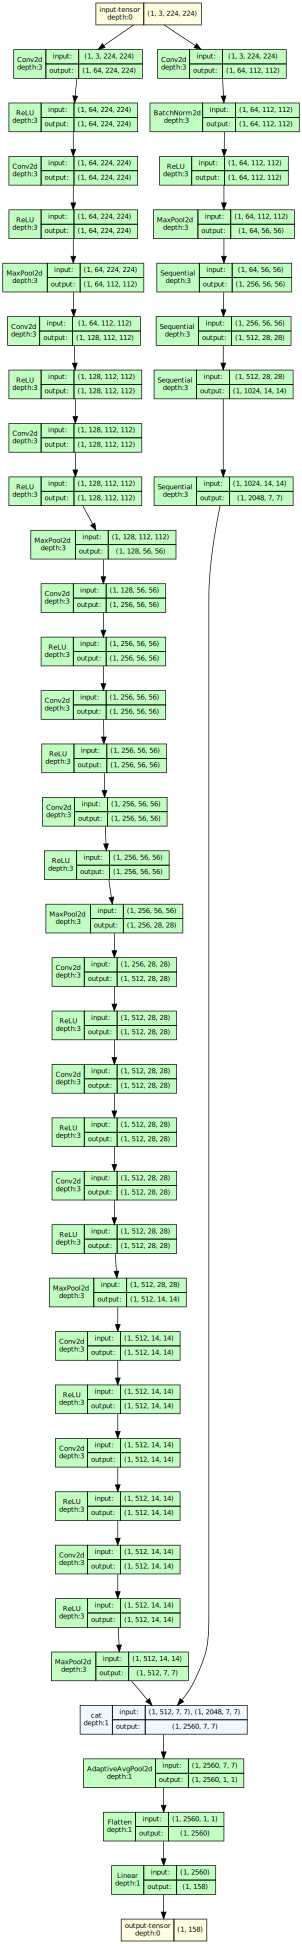

In [ ]:
model_plot = draw_graph(model, input_size=(1,3,224,224))
model_plot.visual_graph

# **OPTIMZER**

In [ ]:
lr = 0.001

WEIGHT_DECAY = 0.0005
save_path = "model.pth"
fine_tune = True
#load_path = "/kaggle/working/model_1.pth"

In [ ]:
# loss function
loss_fn = nn.CrossEntropyLoss()

params = list(model_1.parameters()) + list(model_2.parameters()) #+ list(model.parameters())
optimizer= torch.optim.SGD(params, lr= lr, momentum=0.9)

# **LOAD MODEL**

In [ ]:
#state_dict = torch.load(load_path, map_location=device)
#model.load_state_dict(state_dict)

# **TRAINING**

In [ ]:
def train(model,dataloader):
    # training function

    print('Training')
    model.train()
    running_loss = 0.0
    running_correct = 0
    total=0
    for batch, (X, y) in enumerate(tqdm(dataloader)):


        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
        total += y.size(0)

    loss = running_loss/len(dataloader)
    accuracy = 100.*running_correct/total
    print('Train Loss: %.3f | Accuracy: %.3f'%(loss, accuracy))


    #print(f"Train Loss: {loss:.4f}, Train Acc: {accuracy:.2f}")


    return loss, accuracy

# **VALIDATION**

In [ ]:
#validation function
def validate(model, dataloader):
    print('Validating')
    model.eval()
    running_loss = 0.0
    running_correct = 0
    total=0
    with torch.no_grad():

        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # Compute prediction error
            pred = model(X)
            loss = loss_fn(pred, y)
            running_loss += loss_fn(pred, y).item()
            running_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            total += y.size(0)

    loss = running_loss/len(dataloader)
    accuracy = 100.*running_correct/total
    #print(f'Val Loss: {loss:.4f}, Val Acc: {accuracy:.2f}')
    print('Test Loss: %.3f | Accuracy: %.3f'%(loss, accuracy))


    return loss, accuracy

# **TRAINING AND VALIDATION IN SINGLE FUNCTION**

In [ ]:
epochs=50


train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []
print(f"Training on {len(train_data)} examples, validating on {len(test_data)} examples...")

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy = train(model, trainLoader)
    val_epoch_loss, val_epoch_accuracy = validate(model, testLoader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)


Training on 1106 examples, validating on 474 examples...
Epoch 1 of 50
Training


  0%|          | 0/185 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 185/185 [00:48<00:00,  3.79it/s]

Train Loss: 5.093 | Accuracy: 0.633
Validating


Test Loss: 5.052 | Accuracy: 0.844
Epoch 2 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 4.999 | Accuracy: 2.080
Validating


Test Loss: 4.931 | Accuracy: 3.376
Epoch 3 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 4.816 | Accuracy: 5.515
Validating


Test Loss: 4.744 | Accuracy: 5.485
Epoch 4 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 4.569 | Accuracy: 11.031
Validating


Test Loss: 4.348 | Accuracy: 14.135
Epoch 5 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 4.286 | Accuracy: 17.812
Validating


Test Loss: 4.279 | Accuracy: 9.494
Epoch 6 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.16it/s]

Train Loss: 4.032 | Accuracy: 28.119
Validating


Test Loss: 3.702 | Accuracy: 30.802
Epoch 7 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 3.718 | Accuracy: 34.268
Validating


Test Loss: 3.341 | Accuracy: 37.131
Epoch 8 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 3.474 | Accuracy: 45.118
Validating


Test Loss: 2.933 | Accuracy: 55.063
Epoch 9 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 3.114 | Accuracy: 50.633
Validating


Test Loss: 2.793 | Accuracy: 50.211
Epoch 10 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 2.804 | Accuracy: 56.510
Validating


Test Loss: 2.310 | Accuracy: 62.236
Epoch 11 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 2.417 | Accuracy: 63.924
Validating


Test Loss: 1.932 | Accuracy: 71.097
Epoch 12 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 2.043 | Accuracy: 69.078
Validating


Test Loss: 1.538 | Accuracy: 75.105
Epoch 13 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 1.492 | Accuracy: 75.588
Validating


Test Loss: 1.536 | Accuracy: 67.300
Epoch 14 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.12it/s]

Train Loss: 1.067 | Accuracy: 82.459
Validating


Test Loss: 1.409 | Accuracy: 69.620
Epoch 15 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 0.838 | Accuracy: 84.901
Validating


Test Loss: 1.068 | Accuracy: 79.325
Epoch 16 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.590 | Accuracy: 90.416
Validating


Test Loss: 1.062 | Accuracy: 78.903
Epoch 17 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 0.559 | Accuracy: 90.506
Validating


Test Loss: 0.742 | Accuracy: 89.241
Epoch 18 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.326 | Accuracy: 95.479
Validating


Test Loss: 0.551 | Accuracy: 90.928
Epoch 19 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.703 | Accuracy: 90.687
Validating


Test Loss: 0.665 | Accuracy: 89.873
Epoch 20 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.227 | Accuracy: 96.293
Validating


Test Loss: 0.632 | Accuracy: 86.920
Epoch 21 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 0.215 | Accuracy: 96.835
Validating


Test Loss: 0.684 | Accuracy: 87.131
Epoch 22 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 0.077 | Accuracy: 98.463
Validating


Test Loss: 0.488 | Accuracy: 93.038
Epoch 23 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 0.111 | Accuracy: 97.830
Validating


Test Loss: 0.546 | Accuracy: 92.827
Epoch 24 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.039 | Accuracy: 99.548
Validating


Test Loss: 0.548 | Accuracy: 95.148
Epoch 25 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.025 | Accuracy: 99.458
Validating


Test Loss: 0.547 | Accuracy: 93.038
Epoch 26 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.049 | Accuracy: 99.277
Validating


Test Loss: 0.547 | Accuracy: 93.460
Epoch 27 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.003 | Accuracy: 100.000
Validating


Test Loss: 0.604 | Accuracy: 94.515
Epoch 28 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.007 | Accuracy: 99.819
Validating


Test Loss: 0.654 | Accuracy: 95.359
Epoch 29 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.002 | Accuracy: 100.000
Validating


Test Loss: 0.703 | Accuracy: 94.304
Epoch 30 of 50
Training


100%|██████████| 185/185 [00:45<00:00,  4.11it/s]


Train Loss: 0.001 | Accuracy: 100.000
Validating
Test Loss: 0.694 | Accuracy: 94.726
Epoch 31 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.001 | Accuracy: 100.000
Validating


Test Loss: 0.704 | Accuracy: 94.093
Epoch 32 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.732 | Accuracy: 93.882
Epoch 33 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.712 | Accuracy: 94.515
Epoch 34 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.726 | Accuracy: 94.726
Epoch 35 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.12it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.734 | Accuracy: 94.726
Epoch 36 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.12it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.776 | Accuracy: 94.726
Epoch 37 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.772 | Accuracy: 94.304
Epoch 38 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.802 | Accuracy: 94.515
Epoch 39 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.822 | Accuracy: 94.093
Epoch 40 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.849 | Accuracy: 94.093
Epoch 41 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.12it/s]


Train Loss: 0.000 | Accuracy: 100.000
Validating
Test Loss: 0.855 | Accuracy: 93.882
Epoch 42 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.12it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.831 | Accuracy: 94.093
Epoch 43 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.851 | Accuracy: 94.515
Epoch 44 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.836 | Accuracy: 94.304
Epoch 45 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.830 | Accuracy: 94.515
Epoch 46 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.872 | Accuracy: 94.093
Epoch 47 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.900 | Accuracy: 94.304
Epoch 48 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.14it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.886 | Accuracy: 93.882
Epoch 49 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.15it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.882 | Accuracy: 94.515
Epoch 50 of 50
Training


100%|██████████| 185/185 [00:44<00:00,  4.13it/s]

Train Loss: 0.000 | Accuracy: 100.000
Validating


Test Loss: 0.865 | Accuracy: 94.726


# **MODEL SAVING**

In [ ]:
torch.save(model.state_dict(), save_path)
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
model = MyEnsemble(model_1, model_2).to(device)
#model.load_state_dict(torch.load("model.pth"))

state_dict = torch.load(f"/kaggle/working/{save_path}")
model.load_state_dict(state_dict)


<All keys matched successfully>

# **VISUALIZE PREDICTING IMAGE**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch():
    # get batch of images from the test DataLoader
    images, labels = next(iter(testLoader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))

    # Show the real labels on the screen
    print('Real labels: ', ' '.join('%5s' % classes[labels[j]]
                               for j in range(batch_size)))

    # Let's see what if the model identifiers the  labels of those example
    images=images.to(device)
    outputs = model(images)

    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)

    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

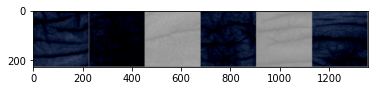

Real labels:    092   122   144   133   048   027
Predicted:    092   122   144   133   048   027


In [ ]:
testBatch()

# **PLOT ACCURACY**

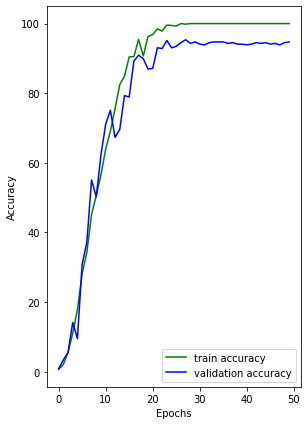

In [ ]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.subplot(121)
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('../outputs/plots/accuracy.png')


# **PLOT LOSS**

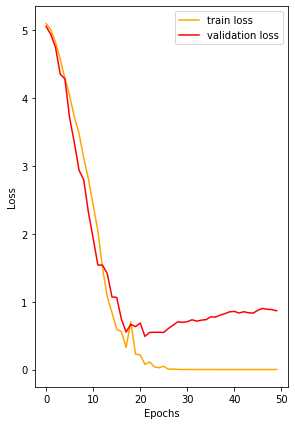

In [ ]:
# loss plots
plt.figure(figsize=(10, 7))
plt.subplot(121)
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('../outputs/plots/loss.png')
plt.show()

In [ ]:
label2class ={ 1 :'001', 2 :'002', 3:'003', 4:'004', 5:'005', 6:'006', 7:'007', 8:'008', 9:'009', 10:'010', 11:'011', 12:'012', 13:'013', 14:'014', 15:'015', 16:'016', 17:'017', 18:'018', 19:'019', 20:'020', 21:'021', 22:'022', 23:'023', 24:'024', 25:'025', 26:'026', 27:'027', 28:'028', 29:'029', 30:'030', 31:'031', 32:'032', 33:'033', 34:'034', 35:'035', 36:'036', 37:'037', 38:'038', 39:'039', 40:'040', 41:'041', 42:'042', 43:'043', 44:'044', 45:'045',46:'046', 47:'047', 48:'048', 49:'049', 50:'050', 51:'051', 52:'052', 53:'053', 54:'054',55:'055', 56:'056', 57:'057', 58:'058', 59:'059', 60:'060', 61:'061', 62:'062', 63:'063',64:'064', 65:'065', 66:'066', 67:'067', 68:'068', 69:'069', 70:'070', 71:'071', 72:'072',73:'073', 74:'074', 75:'075', 76:'076', 77:'077', 78:'078', 79:'079', 80:'080', 81:'081', 82:'082', 83:'083', 84:'084', 85:'085', 86:'086', 87:'087', 88:'088', 89:'089', 90:'090',91:'091', 92:'092', 93:'093', 94:'094', 95:'095', 96:'096', 97:'097', 98:'098', 99:'099', 100:'100', 101:'101', 102:'102', 103:'103', 104:'104', 105:'105', 106:'106', 107:'107', 108:'108', 109:'109', 110:'110', 111:'111', 112:'112', 113:'113', 114:'114', 115:'115', 116:'116', 117:'117',118:'118', 119:'119', 120:'120', 121:'121', 122:'122', 123:'123', 124:'124', 125:'125', 126:'126',127:'127', 128:'128', 129:'129', 130:'130', 131:'131', 132:'132', 133:'133', 134:'134', 135:'135',136:'136', 137:'137', 138:'138', 139:'139', 140:'140', 141:'141', 142:'142', 143:'143', 144:'144',145:'145', 146:'146', 147:'147', 148:'148', 149:'149', 150:'150', 151:'151', 152:'152', 153:'153',154:'154', 155:'155', 156:'156', 157:'157', 158:'158'}


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for batch,(inputs, labels) in enumerate(testLoader):


        inputs= inputs.to(device)
        labels= labels.to(device)
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth



report = classification_report(y_true, y_pred)
print(report)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       0.67      1.00      0.80         4
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       0.80      1.00      0.89         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Text(0.5, 879.0, 'Predicted label')

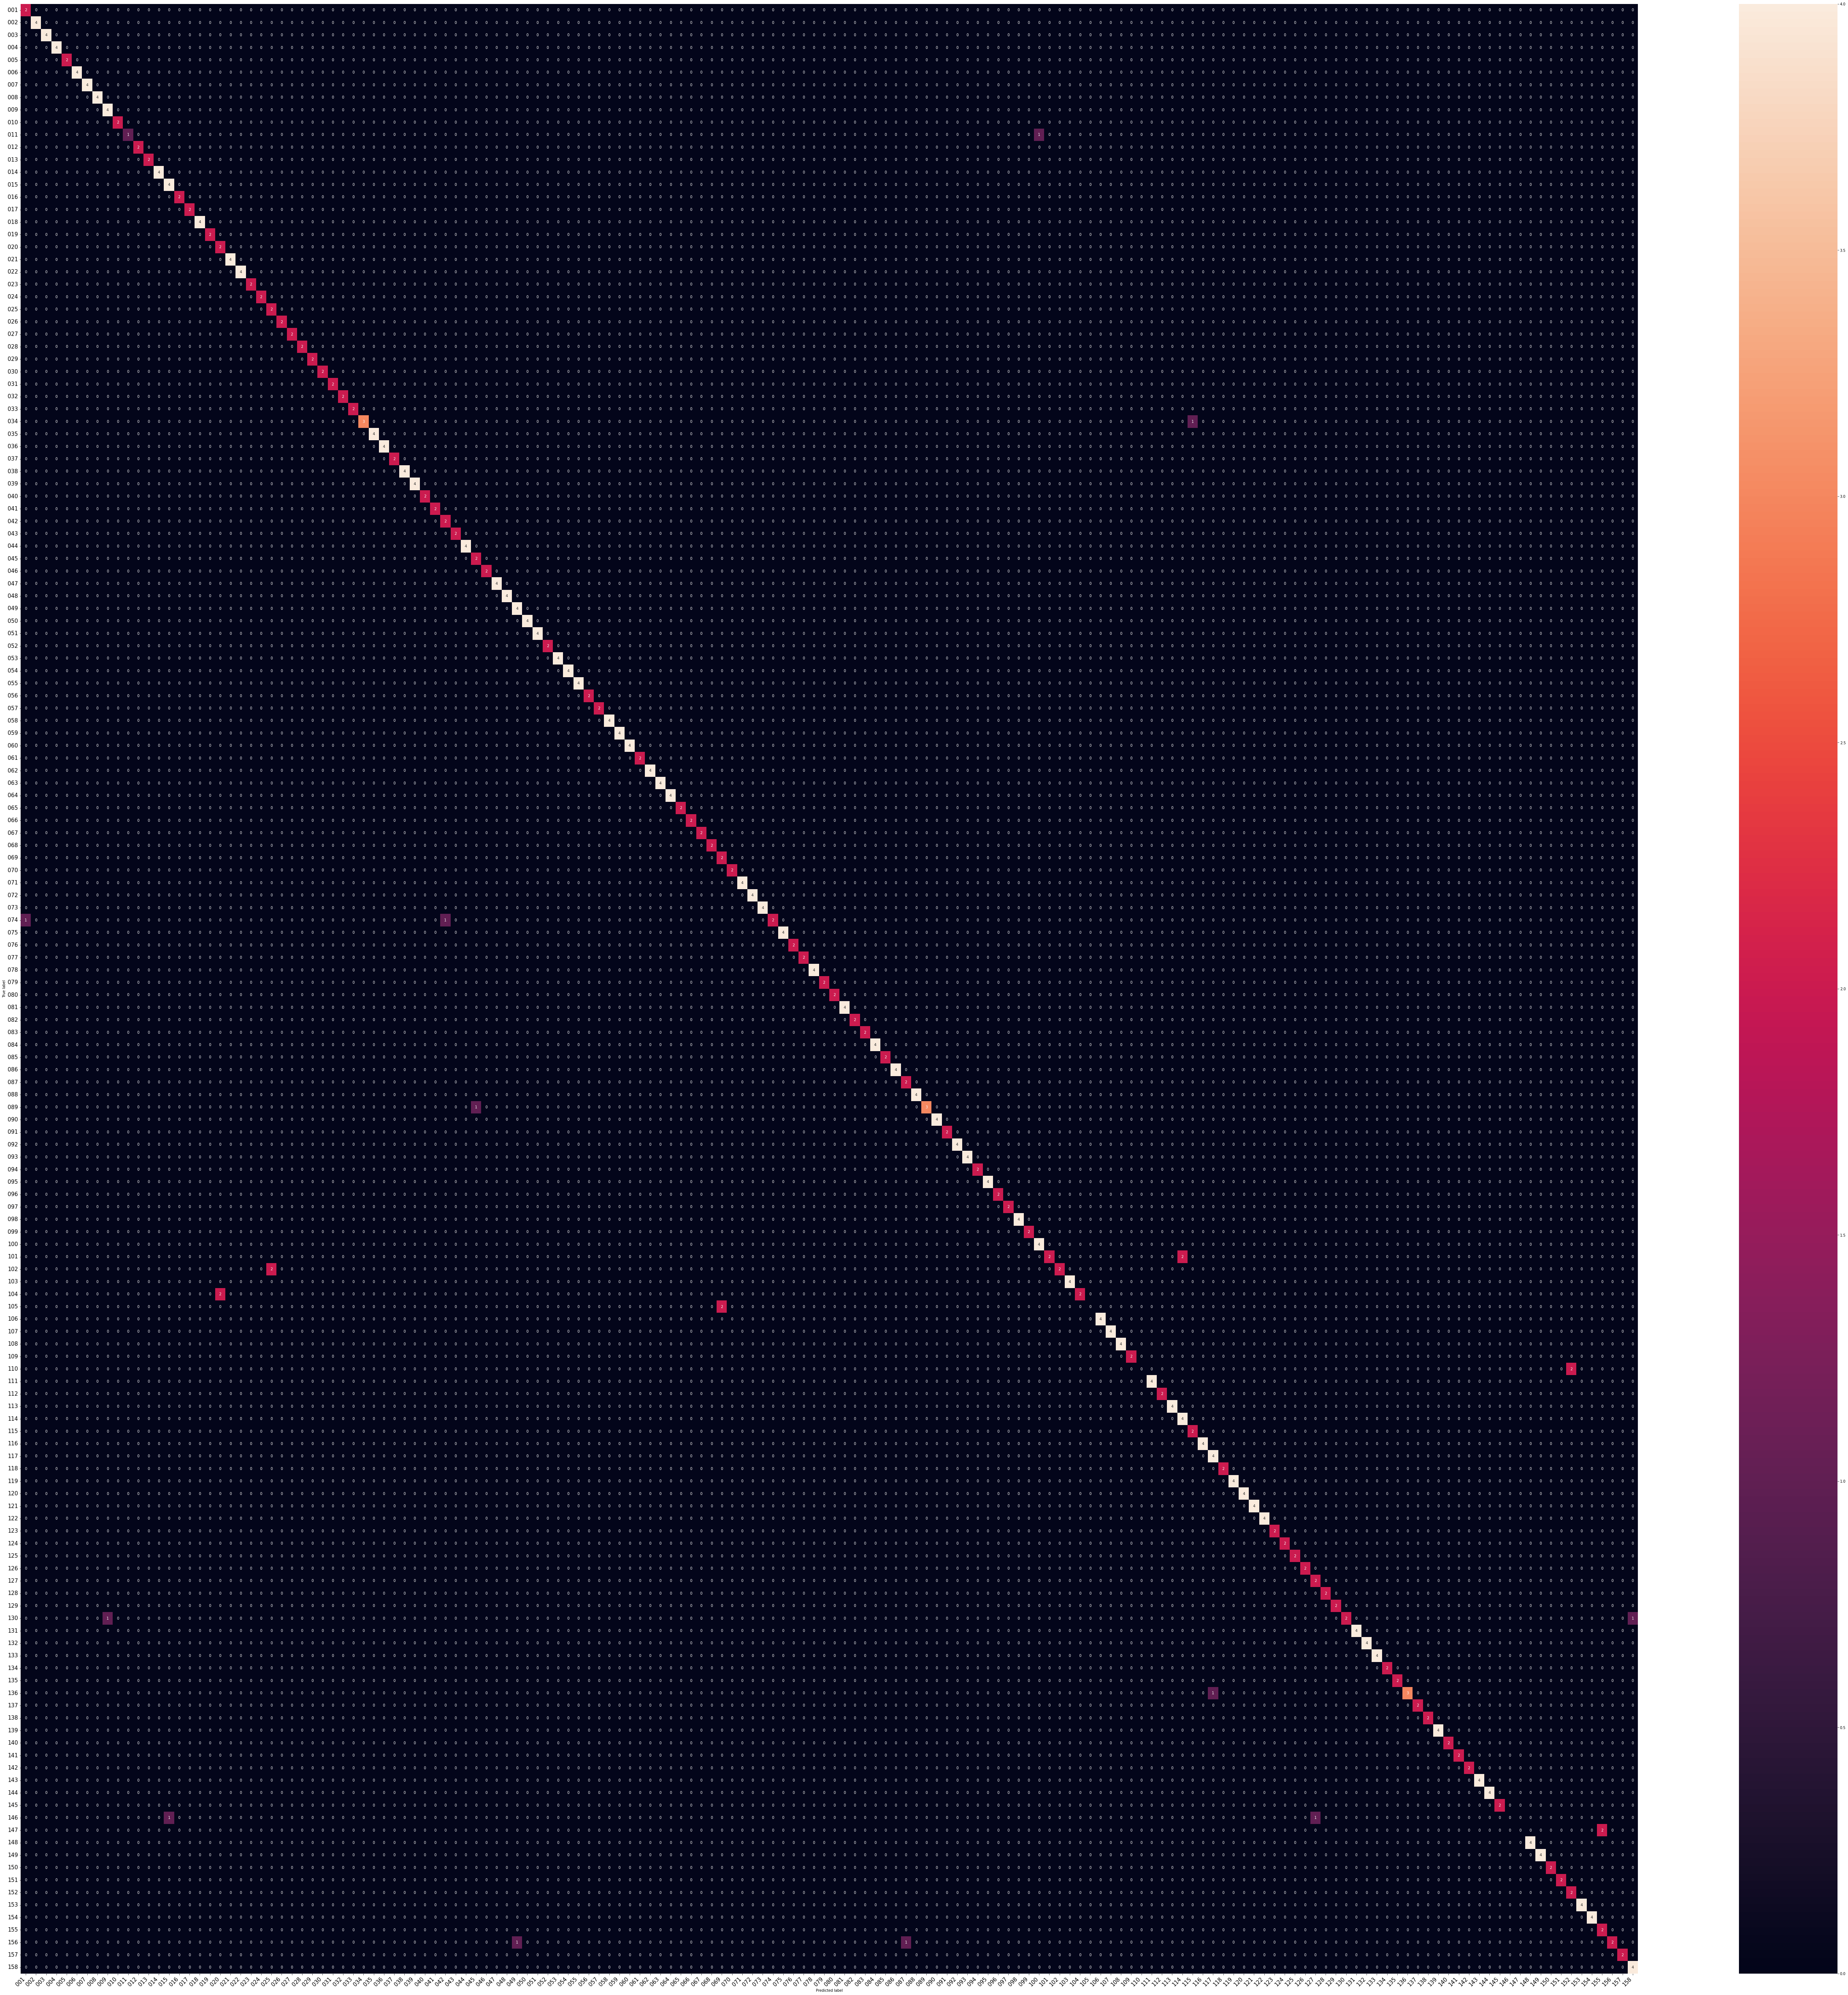

In [ ]:
nb_classes = 158
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testLoader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(100,100))

class_names = list(label2class.values())
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')